In [117]:
# Importing all packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay, plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, Normalizer, LabelEncoder, MaxAbsScaler
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer


from imblearn.over_sampling import SMOTE , RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [118]:
# Open Hotel_Reservations file
df = pd.read_csv('Hotel_Reservations.csv')

In [119]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [120]:
# Looking at info for the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [121]:
# Looking at the mean, standard deviation and inter-quartile range
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


# *EDA*

In [122]:
# Making a new column that is the sum of the weekend and week nights
df['no_of_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']

In [123]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_nights
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,3
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,5
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,3
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,8
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,4
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,8
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled,3


In [124]:
# Getting value counts of market_segment_type column
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

Text(0.5, 1.0, 'Distribution of Booking Status to Number of Car Parking Space')

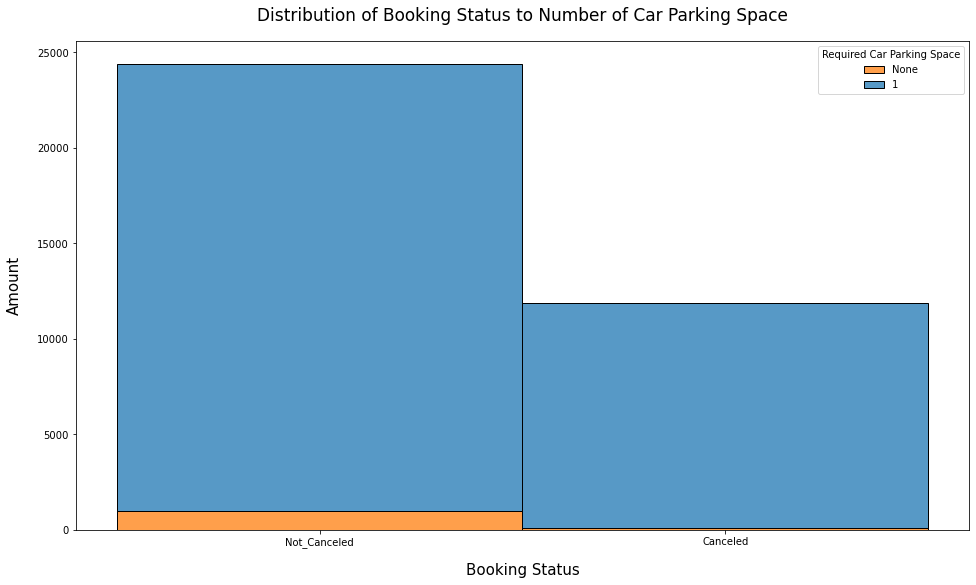

In [32]:
fig, ax = plt.subplots(figsize=(16,9))
chart = sns.histplot(data=df, x=df['booking_status'], hue=df['required_car_parking_space'],  
                         multiple='stack')
plt.legend(title='Required Car Parking Space', labels=['None', '1'])
ax.set_ylabel('Amount', fontsize=15, labelpad=15)
ax.set_xlabel('Booking Status', fontsize=15, labelpad=15)
ax.set_title('Distribution of Booking Status to Number of Car Parking Space', fontsize=17, pad=20)

Text(0.5, 1.0, 'Distribution of Booking Status to Market Segment Type')

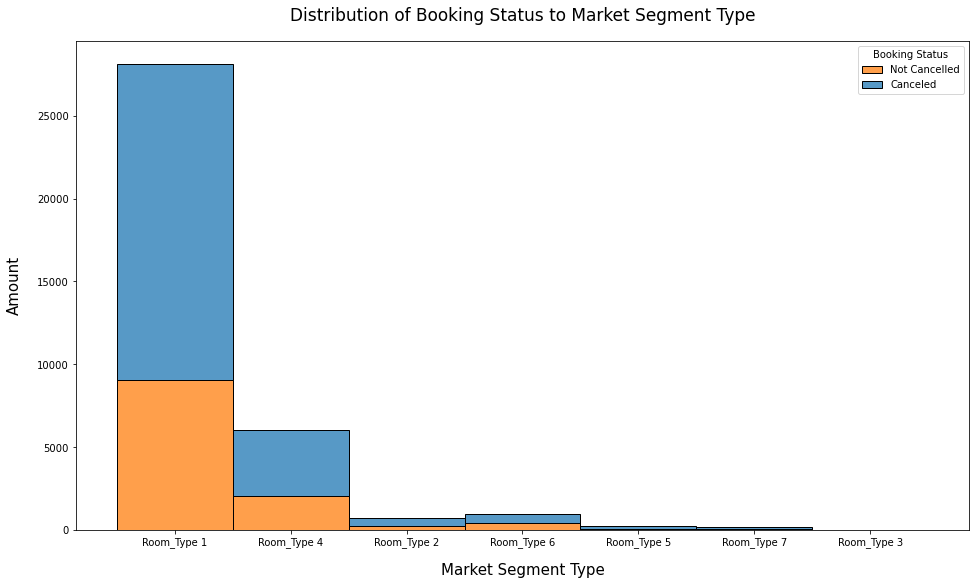

In [38]:
fig, ax = plt.subplots(figsize=(16,9))
chart = sns.histplot(data=df, x=df['room_type_reserved'], hue=df['booking_status'],  
                         multiple='stack')
plt.legend(title='Booking Status', labels=['Not Cancelled', 'Canceled'])
ax.set_ylabel('Amount', fontsize=15, labelpad=15)
ax.set_xlabel('Market Segment Type', fontsize=15, labelpad=15)
ax.set_title('Distribution of Booking Status to Market Segment Type', fontsize=17, pad=20)

Text(0.5, 1.0, 'Distribution of Booking Status to Market Segment Type')

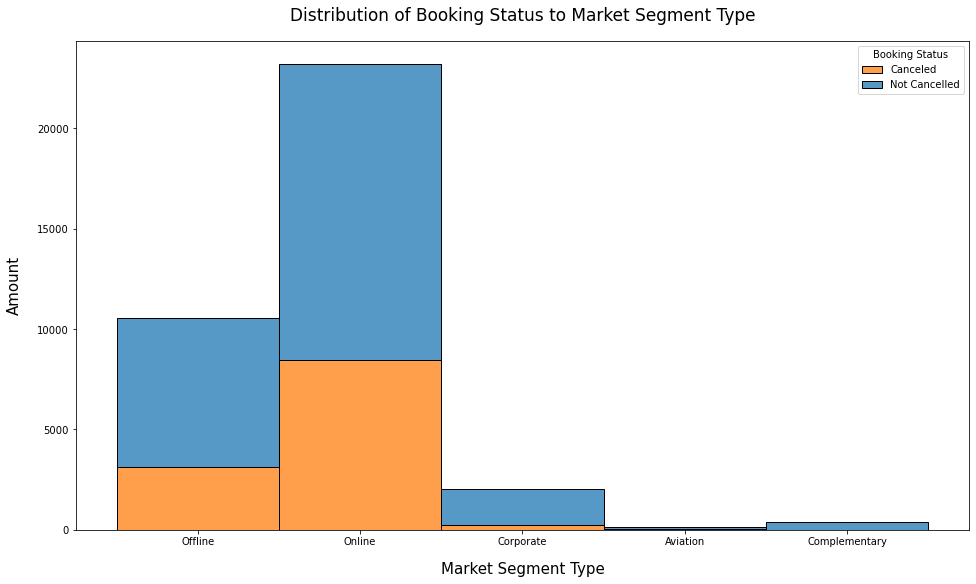

In [44]:
fig, ax = plt.subplots(figsize=(16,9))
chart = sns.histplot(data=df, x=df['market_segment_type'], hue=df['booking_status'],  
                         multiple='stack')
plt.legend(title='Booking Status', labels=['Canceled', 'Not Cancelled'])
ax.set_ylabel('Amount', fontsize=15, labelpad=15)
ax.set_xlabel('Market Segment Type', fontsize=15, labelpad=15)
ax.set_title('Distribution of Booking Status to Market Segment Type', fontsize=17, pad=20)

Text(0.5, 1.0, 'Distribution of Booking Status to Market Segment Type')

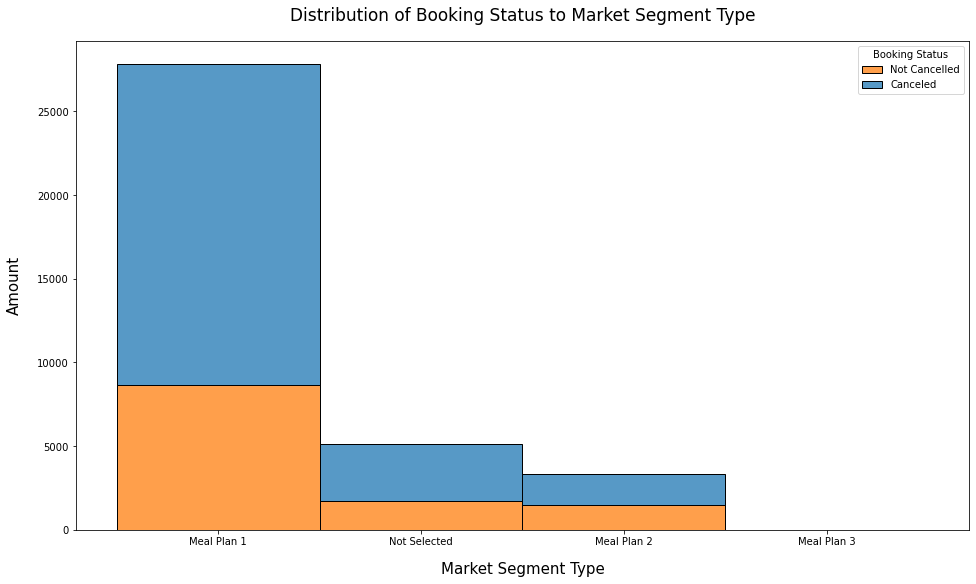

In [45]:
fig, ax = plt.subplots(figsize=(16,9))
chart = sns.histplot(data=df, x=df['type_of_meal_plan'], hue=df['booking_status'],  
                         multiple='stack')
plt.legend(title='Booking Status', labels=['Not Cancelled', 'Canceled'])
ax.set_ylabel('Amount', fontsize=15, labelpad=15)
ax.set_xlabel('Market Segment Type', fontsize=15, labelpad=15)
ax.set_title('Distribution of Booking Status to Market Segment Type', fontsize=17, pad=20)

In [46]:
# Labeling the target variable as binary for the classification models
le = LabelEncoder()
df['booking_status'] = le.fit_transform(df['booking_status'])
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_nights
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1,3
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1,5
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0,3
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,1,8
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,0,4
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,1,8
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,0,3


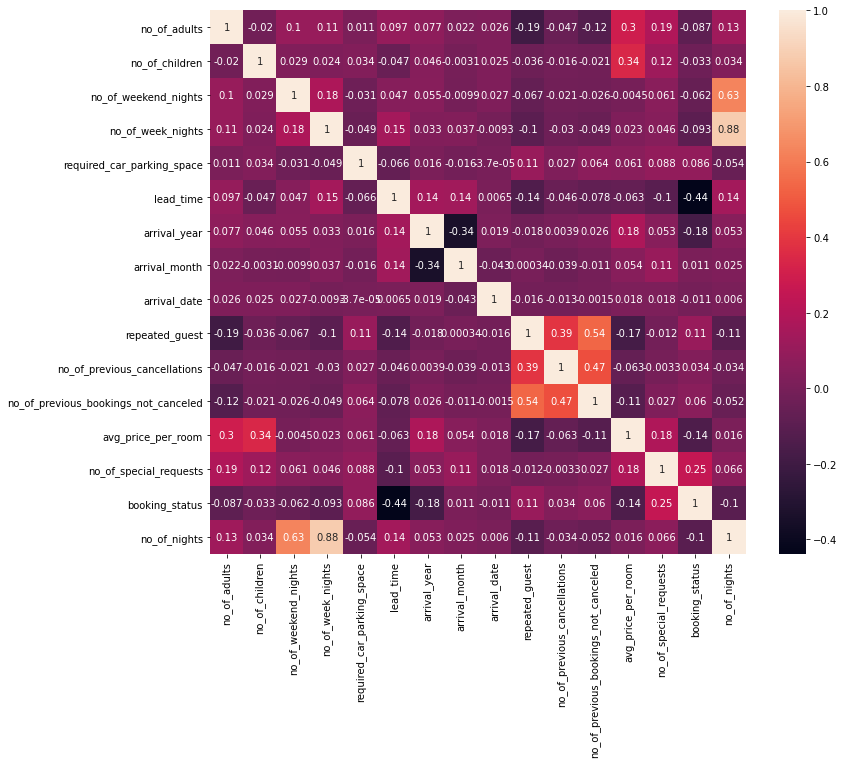

In [47]:
# Looking at correlation between each column through heatmapping
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [48]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_nights
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1,3
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1,5
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0,3
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0,2


In [49]:
# Order for the room type and meal type columns for the ordinal encoder
room_type = ['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4', 'Room_Type 5', 'Room_Type 6', 'Room_Type 7']
type_meal = ['Not Selected', 'Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3']

# Train-Test-Split

In [50]:
# Creating X and y with booking status being the target variable
X = df.drop(columns=['booking_status', 'Booking_ID'])
y = df['booking_status']

In [51]:
# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [52]:
# Target variable imbalanced
y_train.value_counts()

1    19512
0     9508
Name: booking_status, dtype: int64

In [53]:
y_test.value_counts()

1    4878
0    2377
Name: booking_status, dtype: int64

# Pipeline
 - One Hot Encoding
 - Standard Scaling (Wanted to get all numeric columns under the same measurement or scale)
 - Ordinal Encoding
 - Max Abs Scaling (Wanted to get values of 0 and 1 for one hot encoding)

In [54]:
# Preprocessing pipelines

# StandardScaling for columns with integers and floats
numeric_pipe = Pipeline([('numscaler', StandardScaler())])
# OrdinalEncoding and StandardScaling with room type and meal type columns because there is a order for both columns
ordinal_pipe = Pipeline([
    ('ordenc', OrdinalEncoder(categories = [room_type, type_meal])),
    ('ordnorm', StandardScaler())])
# OneHotEncoding and MaxAbsScaling with the market segment type column because this column is categorical
nominal_pipe = Pipeline([
    ('onehot', OneHotEncoder(sparse= False, handle_unknown = 'ignore')),
    ('nominscaler', MaxAbsScaler())])

In [55]:
# Getting the integer and float columns from the X_train for the numeric pipe
num_cols = X_train.select_dtypes(['integer', 'float']).columns
# one_hot_cols = X_train.select_dtypes('object').columns

# Transforming all the columns mentioned in the pipeline
ct = ColumnTransformer([
    ('numbpipe', numeric_pipe, num_cols), 
    ('ordpipe', ordinal_pipe, ['room_type_reserved', 'type_of_meal_plan']), 
    ('nominalpipe', nominal_pipe, ['market_segment_type'])])

In [58]:
# Putting the transformed columns into a dataframe
pd.DataFrame(ct.fit_transform(X_train)).head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.295534,-0.260339,0.216967,-0.143673,-0.180332,2.186595,0.468215,-0.792172,-0.295690,-0.162657,...,-0.242792,-0.786807,-0.007893,-0.507106,0.103821,0.0,0.0,0.0,1.0,0.0
1,0.295534,-0.260339,0.216967,0.563005,-0.180332,0.848146,0.468215,-0.466441,1.651993,-0.162657,...,-0.358024,0.481560,0.549436,-0.507106,0.103821,0.0,0.0,0.0,0.0,1.0
2,0.295534,-0.260339,1.364056,-0.850351,-0.180332,-0.304084,0.468215,1.162218,1.193715,-0.162657,...,-0.282625,0.481560,-0.007893,-0.507106,0.103821,0.0,0.0,0.0,0.0,1.0
3,-1.631314,-0.260339,-0.930123,-0.143673,-0.180332,-0.932573,0.468215,0.836486,1.079145,-0.162657,...,-0.242792,-0.786807,-0.565223,-0.507106,0.103821,1.0,0.0,0.0,0.0,0.0
4,0.295534,4.705177,1.364056,1.269682,-0.180332,-0.362278,0.468215,-1.117904,1.537424,-0.162657,...,2.399010,-0.786807,1.664095,3.066874,0.103821,0.0,0.0,0.0,0.0,1.0


In [59]:
# Setting up the different models for the pipeline
models = [('lreg', LogisticRegression(max_iter=400)), ('knn', KNeighborsClassifier()), ('dt', DecisionTreeClassifier())]
# Stacking all the models together for the pipeline
sc = StackingClassifier(models)

In [60]:
# Making a pipeline for the models, the preprocess, and for the class imbalance using SMOTE
pl = Pipeline([('preprocess', ct),('smote', SMOTE()), ('model', sc)])

In [61]:
# Fitting the pipeline
pl.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numbpipe',
                                                  Pipeline(steps=[('numscaler',
                                                                   StandardScaler())]),
                                                  Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_pre...
                                                  ['room_type_reserved',
                                                   'type_of_meal_plan']),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                               

In [120]:
# Score of the pipeline for the test dataset
pl.score(X_test, y_test)

0.8807718814610613

In [121]:
# Score of the pipeline for the train dataset
pl.score(X_train, y_train)

0.9733976567884218

In [63]:
# Fitting and transforming the X_train and X_test from the column transformer
X_train_c = ct.fit_transform(X_train)
X_test_c = ct.transform(X_test)

In [64]:
# Making the test transformed into a dataset
X_test_ct = pd.DataFrame(X_test_c)
X_train_ct = pd.DataFrame(X_train_c)

# Base Logistic Regression Model

In [109]:
# Base Logistic Regression Model
lreg_new = LogisticRegression()
lreg_new_pipe = Pipeline([('preprocess', ct), ('smo', SMOTE()), ('lreg2_model', lreg_new)])

In [110]:
# Fitting Logistic Regression Model with preprocessing and SMOTE
lreg_new_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numbpipe',
                                                  Pipeline(steps=[('numscaler',
                                                                   StandardScaler())]),
                                                  Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_pre...
                                                                                              ['Not '
                                                                                               'Selected',
                                                                                               'Meal '
                                                                                               'Plan '
           

In [97]:
# Accuracy of the the model for the test and train data
print(lreg_new_pipe.score(X_test, y_test))
print(lreg_new_pipe.score(X_train, y_train))

0.7816678152997932
0.7789800137835975


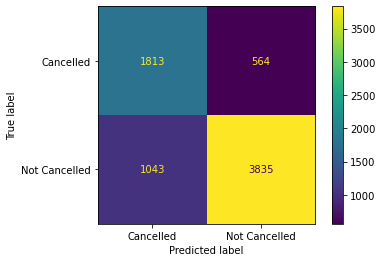

In [111]:
# Making a Confusion Matrix for the base Logistic Regression Model on the test data
plot_confusion_matrix(lreg_new_pipe, X_test, y_test, display_labels=['Cancelled', 'Not Cancelled'])
plt.show()

In [113]:
# Prediction for the base logistic regression model on the X_test
y_lregs_pred = lreg_new_pipe.predict(X_test)

In [115]:
# Looked at the Classification summary for the base logistic regression model
print(classification_report(y_test, y_lregs_pred))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69      2377
           1       0.87      0.79      0.83      4878

    accuracy                           0.78      7255
   macro avg       0.75      0.77      0.76      7255
weighted avg       0.79      0.78      0.78      7255



# Other models without hyperparameters

In [86]:
# Fitting and getting the accuracy of the KNeighborsClassifier Model
knn = KNeighborsClassifier().fit(X_train_ct, y_train)
print(knn.score(X_test_ct, y_test))
print(knn.score(X_train_ct, y_train))

0.8464507236388698
0.892487939352171


In [35]:
# Fitting and getting the accuracy of the DecisionTreeClassifier Model
dt = DecisionTreeClassifier().fit(X_train_ct, y_train)
print(dt.score(X_test_ct, y_test))
print(dt.score(X_train_ct, y_train))

0.8711233631977946
0.9941764300482426


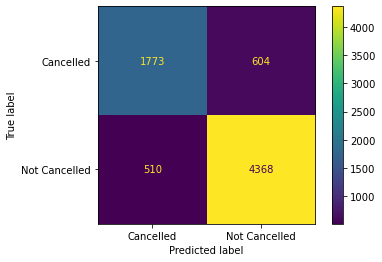

In [87]:
# Confusion Matrix for the the KNeighbors Classifier without any hyperparameters
plot_confusion_matrix(knn, X_test_ct, y_test, display_labels=['Cancelled', 'Not Cancelled'])
plt.show()

In [68]:
# Predicting the predictor variables from the test for the pipeline with the 3 models (logistic regression, knn classifier, and decision tree classifier)
y_pred = pl.predict(X_test)

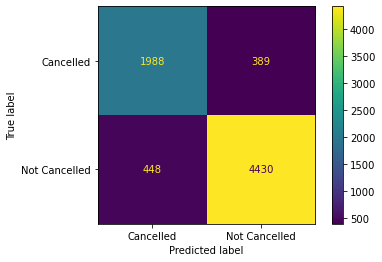

In [70]:
# Confusion Matrix for the pipeline
plot_confusion_matrix(pl, X_test,y_test, display_labels=['Cancelled', 'Not Cancelled'])

In [71]:
# Mean absolute error for the predictions
mean_absolute_error(y_pred, y_test)

0.11536871123363197

# Stacked Classification Models (Logistic Regression, KNN, and Random Forest) with hyperparameter tuning

In [72]:
# Adding hyperparameters for the logistic regression model
# Chose penalty and C to see which value creates the best balance between variance and bias
pl_grid = {'model__lreg__C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 
           'model__lreg__penalty': ['l1', 'l2', 'elasticnet']}

In [73]:
# Doing a grid search on the pipeline with the new hyperparameters for logistic regression with a cross validation of 10 and scoring it with roc_auc
full_pipe = GridSearchCV(estimator=pl, 
                         param_grid=pl_grid, 
                         scoring='roc_auc', 
                         cv=10)

In [43]:
# Fitting the grid search
full_pipe.fit(X_train, y_train);

In [44]:
# Getting the best parameters for the logistic regression model
full_pipe.best_params_

{'model__lreg__C': 10, 'model__lreg__penalty': 'l2'}

In [45]:
# Looking for the best score for the logitsic regression model
full_pipe.best_score_

0.932295239249156

In [46]:
# Looking for the best estimator for the logistic regression model
best_lr_model = full_pipe.best_estimator_
best_lr_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numbpipe',
                                                  Pipeline(steps=[('numscaler',
                                                                   StandardScaler())]),
                                                  Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_pre...
                                                  ['room_type_reserved',
                                                   'type_of_meal_plan']),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                               

In [47]:
# Predicting on the X_test for the logistic regression model
y_pred = best_lr_model.predict(X_test)

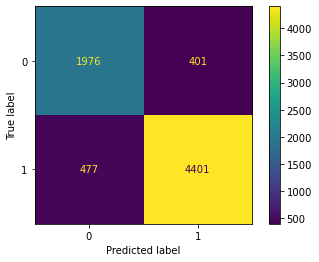

In [48]:
# The confusion matrix for the logistic regression model model
plot_confusion_matrix(best_lr_model, X_test, y_test)

In [49]:
# Absolute Error for logistic regression model
mean_absolute_error(y_pred, y_test)

0.12101998621640248

In [76]:
# Adding hyperparameters for the KNeighbors Classifier Model
# Using n_neighbors and p to create a well balanced distance metric for the best result
knn_grid = {'model__knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17], 
            'model__knn__p': [1, 2, 3, 4, 5]}

# Doing a grid search on the pipeline with the new hyperparameters for KNeighbors with a cross validation of 10 and scoring it with roc_auc
knn_pipe = GridSearchCV(estimator=pl, 
                        param_grid=knn_grid, 
                        scoring='roc_auc', 
                        cv=10, 
                        n_jobs=-1)

In [34]:
# Fitting knn_pipe on train data
knn_pipe.fit(X_train, y_train);

In [41]:
# Getting the best score of the knn_pipe
display(knn_pipe.best_score_)

0.9343008434043115

In [42]:
# Getting the best parameters of the knn_pipe
display(knn_pipe.best_params_)

{'model__knn__n_neighbors': 17, 'model__knn__p': 1}

In [43]:
# Getting the best estimator of the knn_pipe
best_knn_model = display(knn_pipe.best_estimator_)
best_knn_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numbpipe',
                                                  Pipeline(steps=[('numscaler',
                                                                   StandardScaler())]),
                                                  Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_pre...
                                                   'type_of_meal_plan']),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
       

In [38]:
# Predicting for the best knn model on the X_test
y_knn_pred = best_knn_model.predict(X_test)

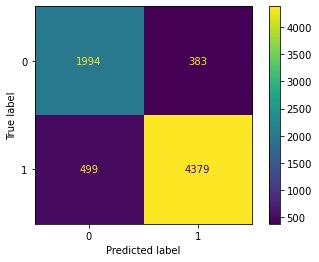

In [39]:
# Confusion Matrix on the best knn model on the test data 
plot_confusion_matrix(best_knn_model, X_test, y_test)

In [40]:
# Finding error on the knn model
mean_absolute_error(y_knn_pred, y_test)

0.12157133011716058

In [45]:
# Looking at the classification summary for the knn model
print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2377
           1       0.92      0.90      0.91      4878

    accuracy                           0.88      7255
   macro avg       0.86      0.87      0.86      7255
weighted avg       0.88      0.88      0.88      7255



# Random Forest Classifier Model with no hyperparameter and hyperparameter tuning after

In [140]:
# Creating a random forest classifier along with the preprocessing and SMOTE
rf = RandomForestClassifier()
rf_pipe = Pipeline([('preprocess', ct), ('smo', SMOTE()), ('rf_model', rf)])

In [141]:
# Fitting the random forest model on the train data
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numbpipe',
                                                  Pipeline(steps=[('numscaler',
                                                                   StandardScaler())]),
                                                  Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_pre...
                                                                                              ['Not '
                                                                                               'Selected',
                                                                                               'Meal '
                                                                                               'Plan '
           

In [133]:
# Getting accuracy on the random forest model
print(rf_pipe.score(X_test, y_test))
print(rf_pipe.score(X_train, y_train))

0.9053066850447967
0.9940385940730531


In [142]:
# Adding hyperparameters to the random classifier model
# Using n_neighbors, max_depth, and criterion to create a well balanced grouping of features on the target variable for the best result
rf_grid = {'rf_model__n_estimators': [100, 150, 200, 250, 300], 
           'rf_model__criterion': ['gini', 'entropy'], 
           'rf_model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8]}
# Doing a grid search with the new hyperparameters for random forest with a cross validation of 10 and scoring it with roc_auc
rf_search = GridSearchCV(estimator=rf_pipe, 
                       param_grid=rf_grid, 
                       scoring='roc_auc', 
                       cv=10)

In [143]:
# Fitting random forest model on train data
rf_search.fit(X_train, y_train);

In [145]:
# The best auc score for the random forest model
display(rf_search.best_score_)

0.9171212941712195

In [146]:
# The best parameters for the random forest model
display(rf_search.best_params_)

{'rf_model__criterion': 'gini',
 'rf_model__max_depth': 8,
 'rf_model__n_estimators': 250}

In [149]:
# The best estimator for the random forest model
best_rf_model = rf_search.best_estimator_
best_rf_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numbpipe',
                                                  Pipeline(steps=[('numscaler',
                                                                   StandardScaler())]),
                                                  Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_pre...
                                                                                               '1',
                                                                                               'Meal '
                                                                                               'Plan '
                                                                                               '2',
                    

In [150]:
# Predicting for the best random forest model on the X_test
y_rf_pred = best_rf_model.predict(X_test)

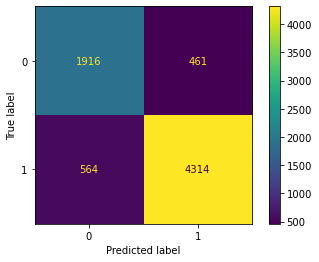

In [151]:
# Confusion Matrix on the best random forest model on the test data 
plot_confusion_matrix(best_rf_model, X_test, y_test)

In [152]:
# Finding error on the random forest model
mean_absolute_error(y_rf_pred, y_test)

0.14128187456926258

In [153]:
# Looking at the classification summary for the random forest model
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      2377
           1       0.90      0.88      0.89      4878

    accuracy                           0.86      7255
   macro avg       0.84      0.85      0.84      7255
weighted avg       0.86      0.86      0.86      7255



In [211]:
# Getting the most important features for the target variable
feat_imp = best_rf_model['rf_model'].feature_importances_

feat_imp

array([1.45921897e-02, 1.31273730e-03, 1.26270211e-02, 1.70199576e-02,
       1.17725521e-02, 3.68269285e-01, 5.27708432e-02, 6.61983894e-02,
       1.58972275e-02, 6.66257001e-03, 2.95491464e-04, 4.62243607e-03,
       8.61909882e-02, 1.91239826e-01, 2.53791734e-02, 5.50675669e-03,
       1.47345560e-02, 3.87578757e-04, 1.30541197e-03, 1.17105072e-02,
       3.37430824e-02, 5.77614184e-02])

In [212]:
# Putting the preprocessed columns into a list to get the names of the features for the feature importance
col_names = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'x0_Aviation', 'x0_Complementary', 'x0_Corporate', 'x0_Offline',
       'x0_Online', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'no_of_nights']

In [367]:
# Creating a data frame of the feature importance with the label and sorted from largest to smallest
feat_imp_data = pd.DataFrame(zip(col_names, feat_imp)).sort_values(by=1, ascending=False)
feat_imp_data

,0,1
5,required_car_parking_space,0.368269
13,x0_Corporate,0.191240
12,x0_Complementary,0.086191
7,lead_time,0.066198
21,no_of_nights,0.057761
6,room_type_reserved,0.052771
20,no_of_special_requests,0.033743
14,x0_Offline,0.025379
3,no_of_week_nights,0.017020
8,arrival_year,0.015897


In [369]:
# Getting the top 8 most important features
feat_imp_data = feat_imp_data.iloc[:8]
feat_imp_data

,0,1
5,required_car_parking_space,0.368269
13,x0_Corporate,0.191240
12,x0_Complementary,0.086191
7,lead_time,0.066198
21,no_of_nights,0.057761
6,room_type_reserved,0.052771
20,no_of_special_requests,0.033743
14,x0_Offline,0.025379


<Figure size 1152x720 with 0 Axes>

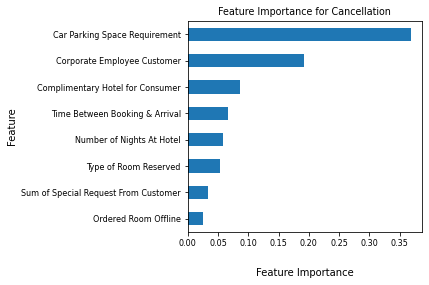

In [370]:
# Creating new labels for the bar plot so it is more understandable
new_labels = ['Car Parking Space Requirement', 
              'Corporate Employee Customer', 
              'Complimentary Hotel for Consumer', 
              'Time Between Booking & Arrival', 
              'Number of Nights At Hotel', 
              'Type of Room Reserved', 
              'Sum of Special Request From Customer', 
              'Ordered Room Offline']
# Creating a barplot of the feature importances
plt.figure(figsize=(16,10))
n = 8
feat_imp_data_top = feat_imp_data.iloc[:n,:]
plt.rcParams.update({'font.size': 8})
num_features = 10
feat_imp_data.plot(kind = 'barh')
plt.yticks(range(0, len(feat_imp_data)), new_labels)
# plt.yticks(rotation=15)
plt.ylabel('Feature', fontsize=10)
plt.xlabel('Feature Importance', fontsize=10, labelpad=20)
plt.title('Feature Importance for Cancellation')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.legend().remove()
plt.show()

In [76]:
# Looking at the the logistic regression model without stacking
lreg2 = LogisticRegression(C=10, penalty='l2')
lreg2_pipe = Pipeline([('preprocess', ct), ('smo', SMOTE()), ('lreg2_model', lreg2)])

In [77]:
# Fitting the logistic regression model on the train data
lreg2_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numbpipe',
                                                  Pipeline(steps=[('numscaler',
                                                                   StandardScaler())]),
                                                  Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_pre...
                                                                                               'Selected',
                                                                                               'Meal '
                                                                                               'Plan '
                                                                                               '1',
             

In [82]:
# Getting the score of the new logistic regression model on the test and train data
print(lreg2.score(X_test_ct, y_test))
print(lreg2.score(X_train_ct, y_train))

0.7812543073742246
0.7778773259820814


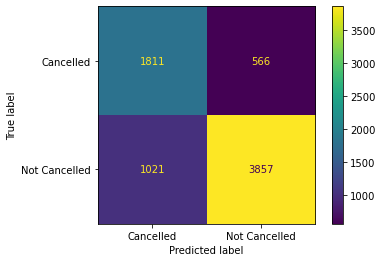

In [83]:
# Confusion Matrix on the logitsic regression model on the test data 
plot_confusion_matrix(lreg2_pipe, X_test, y_test, display_labels=['Cancelled', 'Not Cancelled'])
plt.show()

# Final Model (Unstacked KNN Classifier with hyperparameter tuning)

In [100]:
# Looking at the the knn model without stacking
kneigh = KNeighborsClassifier(n_neighbors=17, p=1)
kneigh_pipe = Pipeline([('preprocess', ct), ('smo', SMOTE()), ('kn_model', kneigh)])

In [101]:
# Fitting the knn model on the train data
kneigh_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numbpipe',
                                                  Pipeline(steps=[('numscaler',
                                                                   StandardScaler())]),
                                                  Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_pre...
                                                                                               'Meal '
                                                                                               'Plan '
                                                                                               '1',
                                                                                               'Meal '
                 

In [102]:
# Getting the score of the knn model on the train and test data
print(kneigh_pipe.score(X_test, y_test))
print(kneigh_pipe.score(X_train, y_train))

0.8275671950379049
0.8516195727084769


In [103]:
# Predicting on the test data for the knn model
y_kneigh_pred = kneigh_pipe.predict(X_test)

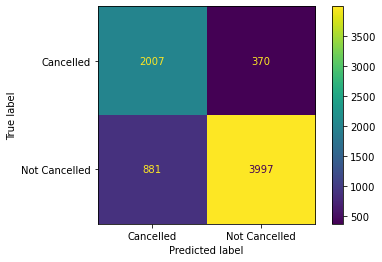

In [104]:
# Confusion Matrix on the knn model on the test data 
plot_confusion_matrix(kneigh_pipe, X_test, y_test, display_labels=['Cancelled', 'Not Cancelled'])
plt.show()

In [105]:
# Finding error on the knn model
mean_absolute_error(y_kneigh_pred, y_test)

0.1724328049620951

In [108]:
# Looking at the classification summary for the random forest model
# This is the final model because of the precision being 92%
print(classification_report(y_test, y_kneigh_pred, target_names=['Cancelled', 'Not Cancelled']))

               precision    recall  f1-score   support

    Cancelled       0.69      0.84      0.76      2377
Not Cancelled       0.92      0.82      0.86      4878

     accuracy                           0.83      7255
    macro avg       0.81      0.83      0.81      7255
 weighted avg       0.84      0.83      0.83      7255



# Unstacked Random Forest Classifier with hyperparameter tuning

In [327]:
# Looking at the the random forest model with hyperparameters
randf = RandomForestClassifier(criterion='gini', max_depth=8, n_estimators=250)
randf_pipe = Pipeline([('preprocess', ct), ('smo', SMOTE()), ('rand_model', randf)])

In [328]:
# Fitting the random forest model onto the train data
randf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numbpipe',
                                                  Pipeline(steps=[('numscaler',
                                                                   StandardScaler())]),
                                                  Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_pre...
                                                                                               'Meal '
                                                                                               'Plan '
                                                                                               '2',
                                                                                               'Meal '
                 

In [329]:
# Getting the score of the random forest model for the train and test data
print(randf_pipe.score(X_test, y_test))
print(randf_pipe.score(X_train, y_train))

0.8587181254307374
0.8586147484493453


In [330]:
# Predicting on the test data for the random forest model
y_randf_pred = randf_pipe.predict(X_test)

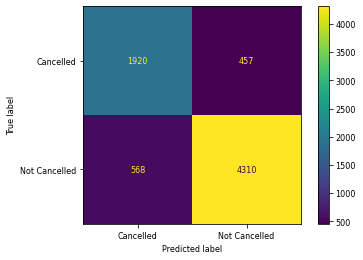

In [375]:
# Confusion Matrix on the random forest model on the test data 
plot_confusion_matrix(randf_pipe, X_test, y_test, display_labels = ['Cancelled', 'Not Cancelled'])
plt.show()

In [ ]:
# Finding error on the random forest model
mean_absolute_error(y_randf_pred, y_test)

In [336]:
# Looking at the classification summary for the random forest model
# Precision is good but it is not as good as the knn model which why this model will not be the final model
print(classification_report(y_test, y_randf_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      2377
           1       0.90      0.88      0.89      4878

    accuracy                           0.86      7255
   macro avg       0.84      0.85      0.84      7255
weighted avg       0.86      0.86      0.86      7255

